# Bifacial on Rooftop

<a id='step1'></a>

In [2]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'TEMP' / 'AgriPV_Oregon_A')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)
    
print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPV_Oregon_A


In [3]:
from bifacial_radiance import *   
import numpy as np
import datetime

In [83]:
lat = 32.2540
lon = -110.9742
tilt = 0 # degrees
sazm = 180 # degrees (south)
numpanels = 1
albedo = 0.15  #' white rooftoop'     

# Three sites differences:
ch = 0.2032  # m -- 8 in

y = 1.65
x = 1
pitch=0.0001

In [84]:
demo = RadianceObj('Oregon', path=testfolder)  # Create a RadianceObj 'object'
demo.setGround(albedo) # input albedo number or material name like 'concrete'.  To see options, run this without any input.
epwfile = demo.getEPW(lat, lon) # NJ lat/lon 40.0583° N, 74.4057
metdata = demo.readWeatherFile(epwfile, coerce_year=2021) # read in the EPW weather data from above
demo.genCumSky()

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\AgriPV_Oregon_A
Loading albedo, 1 value(s), 0.150 avg
1 nonzero albedo values.
Getting weather file: USA_AZ_Davis-Monthan.AFB.722745_TMY3.epw
 ... OK!
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos
Loaded  EPWs\metdata_temp.csv
message: Error!  Solar altitude is -8 < -6 degrees and Idh = 12 > 10 W/m^2 on day 16 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -8 < -6 degrees and Idh = 13 > 10 W/m^2 on day 18 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and Idh = 15 > 10 W/m^2 on day 19 !Ibn is 0.  Attempting to continue!
Error!  Solar altitude is -7 < -6 degrees and 

'skies\\cumulative.rad'

## 1. Loop over the different heights

In [85]:
moduletype='PV-module'
module = demo.makeModule(name=moduletype, x=x, y=y, numpanels=numpanels)
sceneDict = {'tilt':tilt, 'pitch':pitch, 'clearance_height':ch, 'azimuth':sazm, 'nMods':1, 'nRows':1}  
scene = demo.makeScene(module=moduletype, sceneDict=sceneDict) #makeScene creates a .rad file with 20 modules per row, 7 rows.
octfile = demo.makeOct()  # makeOct combines all of the ground, sky and object fil|es into a .oct file.

# Sensor calculation
analysis = AnalysisObj(octfile, demo.name)  # return an analysis object including the scan dimensions for back irradiance
frontscan, backscan = analysis.moduleAnalysis(scene, sensorsy=[1, 160], sensorsx = [1, 100])
analysis.analysis(octfile, 'UL', frontscan = frontscan, backscan = backscan)  # compare the back vs front irradiance  



Module Name: PV-module
Module PV-module updated in module.json
Pre-existing .rad file objects\PV-module.rad will be overwritten

Created Oregon.oct
Linescan in process: UL_Row1_Module1_Front
Linescan in process: UL_Row1_Module1_Back
Saved: results\irr_UL_Row1_Module1_Front.csv
Saved: results\irr_UL_Row1_Module1_Back.csv


({'Wm2': [1992476.0],
  'x': [0.0],
  'y': [0.0],
  'z': [0.2242],
  'r': [1992476.0],
  'g': [1992476.0],
  'b': [1992476.0],
  'mattype': ['a0.0.a0.PV-module.6457'],
  'title': 'UL_Row1_Module1_Front'},
 {'Wm2': [291981.4,
   291896.0,
   291810.2,
   291724.4,
   291638.7,
   291552.9,
   291467.2,
   291381.4,
   291295.7,
   291209.9,
   291124.1,
   291038.4,
   290952.6,
   290866.9,
   290781.1,
   290695.3,
   290609.6,
   290523.8,
   290438.1,
   290352.3,
   290266.6,
   292899.3,
   292836.6,
   292772.3,
   292708.0,
   292643.7,
   292579.4,
   292515.1,
   292450.8,
   292386.5,
   292322.2,
   292257.9,
   292193.6,
   292129.3,
   292065.0,
   292000.7,
   291936.3,
   291872.1,
   291807.8,
   291743.4,
   291679.2,
   291614.8,
   291550.5,
   291492.1,
   291438.2,
   291384.0,
   291329.8,
   291275.7,
   291221.5,
   291167.3,
   291113.2,
   291059.0,
   291004.8,
   290950.7,
   290896.5,
   290842.3,
   290788.2,
   290734.0,
   290679.9,
   290625.7,
   29057

## 2. Plot Bifacial Gain Results

## 3. Plot Heatmaps of the Ground Irradiance

#### First, here is a complicated way to find the maximum of all arrays so all heatmaps are referenced to that value

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [87]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)

sns.set(rc={'figure.figsize':(5,5)})

In [88]:
filepvf= os.path.join(testfolder,'results',f'irr_UL_Row1_Module1_Front.csv')
filepvb= os.path.join(testfolder,'results',f'irr_UL_Row1_Module1_Back.csv')
resultsDF = load.read1Result(filepvf)
resultsDB = load.read1Result(filepvb)

#Saved: results\irr_UL_Row1_Module1_Front.csv
#Saved: results\irr_UL_Row1_Module1_Back.csv

In [89]:
print(np.round(resultsDB['Wm2Back'].mean()*100/resultsDF['Wm2Front'].mean(),1))

13.9


In [90]:
np.zeros([8,4])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [91]:
df = resultsDB.copy()
df['x'] = df['x']*1000
df['x'] = df['x'].astype(int)+490
df['y'] = df['y']*1000
df['y'] = df['y'].astype(int)+814

In [92]:
import numpy as np
matrix = np.zeros((df.x.max()+1, df.y.max()+1))
matrix[df.x, df.y] = df.Wm2Back

<AxesSubplot:>

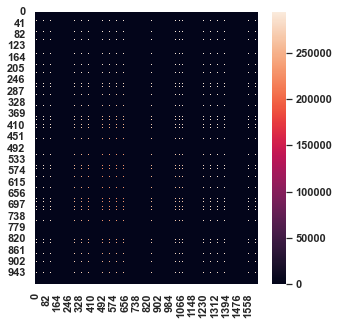

In [93]:
import seaborn as sns
sns.heatmap(matrix)